In [1]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
from scipy.signal import correlate


y1, sr1 = librosa.load('/home/tnguyen/Downloads/sensor1.wav')
y2, sr2 = librosa.load('/home/tnguyen/Downloads/sensor2.wav')
y5, sr5 = librosa.load('/home/tnguyen/Downloads/sensor5.wav')
y9, sr9 = librosa.load('/home/tnguyen/Downloads/sensor9.wav')



In [3]:


# Generate time series for both
t1 = np.arange(len(y1)) / sr1
t9 = np.arange(len(y9)) / sr9

# Cross-correlation
correlation = correlate(y9, y1)

# Compute the delay in terms of the sample rate
delay_samples = correlation.argmax() - len(y9) + 1

#Convert delay from samples to time
delay_time = delay_samples / sr1

print(f'The estimated time delay is {delay_time} seconds.')

The estimated time delay is -510.8849886621315 seconds.


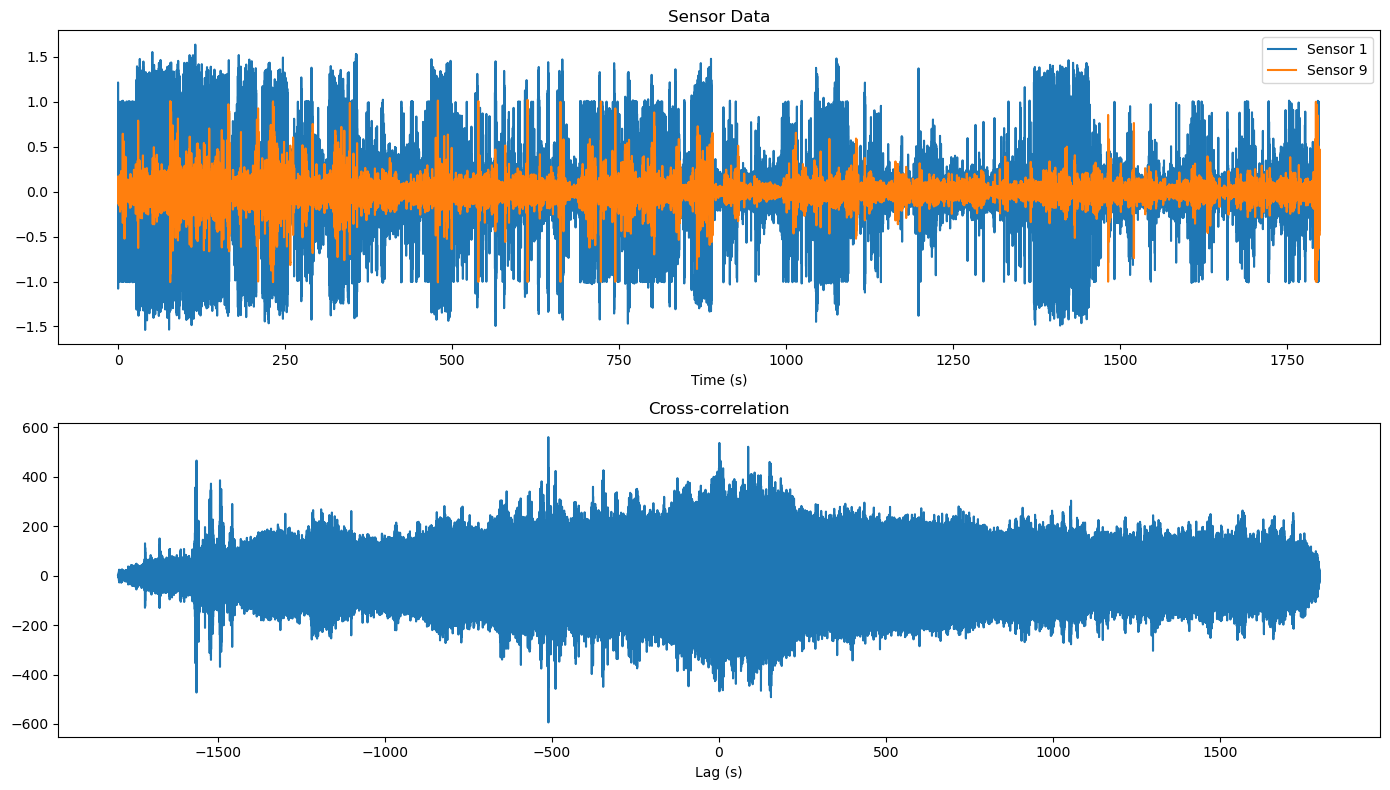

In [4]:
# plot y1 and y9
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(t1, y1, label='Sensor 1')
plt.plot(t9, y9, label='Sensor 9')
plt.title('Sensor Data')
plt.xlabel('Time (s)')
plt.legend()

plt.subplot(2, 1, 2)
lags = np.arange(-len(y1) + 1, len(y9))
plt.plot(lags / sr1, correlation)
plt.title('Cross-correlation')
plt.xlabel('Lag (s)')

plt.tight_layout()
plt.show()

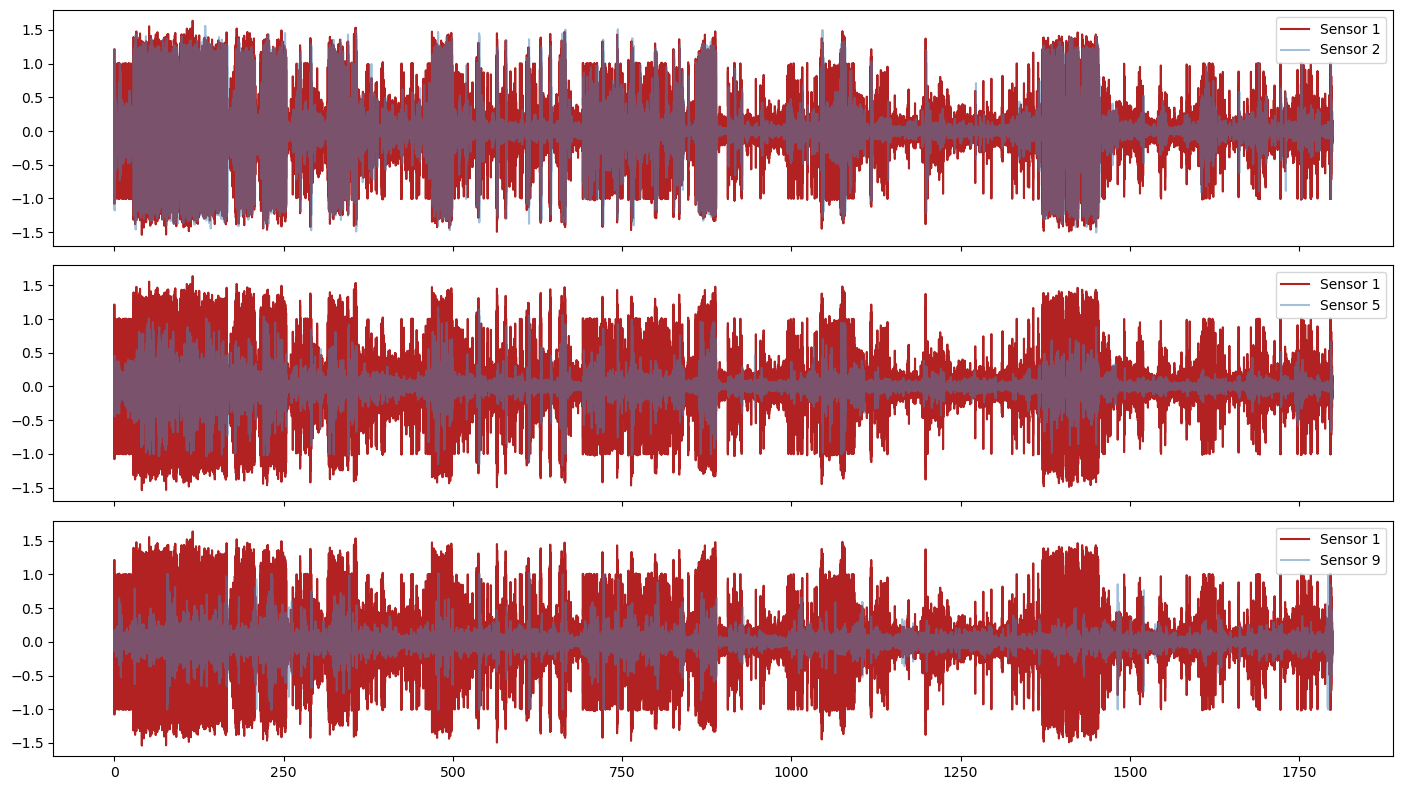

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define time variables for each sensor
t1 = np.arange(len(y1)) / sr1
t2 = np.arange(len(y2)) / sr2
t5 = np.arange(len(y5)) / sr5
t9 = np.arange(len(y9)) / sr9

# Create 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(14,8), sharex=True, sharey=True)

# Plot sensor 1 and sensor 2 waveforms
axs[0].plot(t1, y1, color="firebrick")
axs[0].plot(t2, y2, color="steelblue", alpha=0.5)
axs[0].legend(['Sensor 1', 'Sensor 2'], loc='upper right')
#axs[0].set_title('Sensor 1 and Sensor 2 Waveforms')

# Plot sensor 1 and sensor 5 waveforms
axs[1].plot(t1, y1, color="firebrick")
axs[1].plot(t5, y5, color="steelblue", alpha=0.5)
axs[1].legend(['Sensor 1', 'Sensor 5'], loc='upper right')
#axs[1].set_title('Sensor 1 and Sensor 5 Waveforms')

# Plot sensor 1 and sensor 9 waveforms
axs[2].plot(t1, y1, color="firebrick")
axs[2].plot(t9, y9, color="steelblue", alpha=0.5)
axs[2].legend(['Sensor 1', 'Sensor 9'], loc='upper right')
#axs[2].set_title('Sensor 1 and Sensor 9 Waveforms')

# Adjust space between plots
plt.tight_layout()
plt.savefig('ts_comparison.pdf')
# Show the plot
plt.show()
